<a href="https://colab.research.google.com/github/alchemistklk/pytorch_tutorial/blob/master/01_pytorch_workflow_video_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow
Let's explore an example Pytorch end-to-end workflow.
Resources:
  - Ground truth notebook:https://www.learnpytorch.io/01_pytorch_workflow

In [ ]:
what_we_covering = {1:"data(prepare and load)",
                    2:"build model",
                    3:"fitting the model to data(training)",
                    4:"make predictions and evaluate the model(inference)",
                    5:"save and load a model",
                    6:"putting it all together"}

In [ ]:
import torch
from torch import nn # nn contains all type of Pytorch's building blocks for neural network
import matplotlib.pyplot as plt

## 1.Data (preparing and loading)
Data can be almost everything in machine learning
- Excel Speadsheet
- Images of any kind
- Videos
- Audio like songs and podcasts
- Text

Machine learning is a game if two parts
- Get data into a numerical representation
- Build a model to learn patterns in the numerical representation.


In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step_size = 0.02
X = torch.arange(start, end, step_size).unsqueeze(dim=1)
y=weight *  X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Spliting data into training and test sets(one of the most important concepts in machine learning)

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

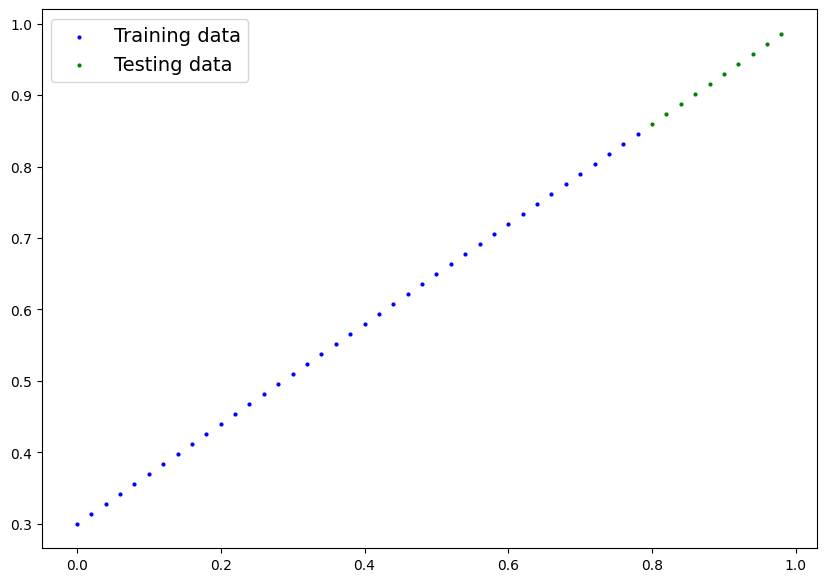

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

## 2.Building first pytorch model
What our model does:
- Start with random value(weight & bias)
- Look at the training data and adjust the random values to better represent

How does it do so?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [ ]:
# #Almost everything in PyTorch inherits from nn.Module
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.weights = nn.Parameter(torch.rand(1,
#                                            dtype=torch.float),
#                                 requires_grad=True)

#     self.bias = nn.Parameter(torch.rand(1,
#                                         dtype=torch.float),
#                              requires_grad=True)

#   # Forward method to define the computation in the model
#   # x: is the input data
#   def forward(self, x:torch.Tensor) -> torch.Tensor:
#     return self.weight * x + self.bias

#### Breaking down what's happening in out PyTorch linear regression model

In [ ]:
# Subclass `nn.Module`(this contains all the building blocks for neural network)
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Initialise `model parameters` to used in various computetion
    """`requires_grad=True` means PyTorch will track the gradients of this
    specific paramter for use with `torch.autograd` and gradient descent
    """
    self.weights = nn.Parameter(torch.rand(1,
                                           dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1,
                                        dtype=torch.float),
                             requires_grad=True)

  # Any subclass of nn.Module needs to override forward()
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

### Pytorch model building essentials
  - `torch.nn` - contains all of the buildings for computational graphs(a neural network can be considered a computational graph)
  - `torch.nn.Parameter` - what a parameter should our model try and learn, often a PyTorch layer from `torch.nn` is set these for us
  - `torch.nn.Module` - The base class for all neural network if you subclass it, you should override forward
  - `torch.optim` -  This is where the optimizers live, this will help with gradient descent
  - `def forward()` - All `nn.Module` subclass requires

See more of these essential modules via the PyTorch cheatsheet: https://pytorch.org/tutorials/beginner/ptcheat.html


 ### Checking the contents of our PyTorch model
 Now we've created a model, let's see what's inside

 So we can check our model parameters or what's inside our model using `.parameter()`


In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [ ]:
### Making prediction using `torch.inference_mode()`
"""Turn off the gradient tracking """
with torch.inference_mode():
  y_pred = model_0(X_test)

# with torch.no_grad():
#   y_pred = model_0(X_test)
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

pytorch inference mode twitter

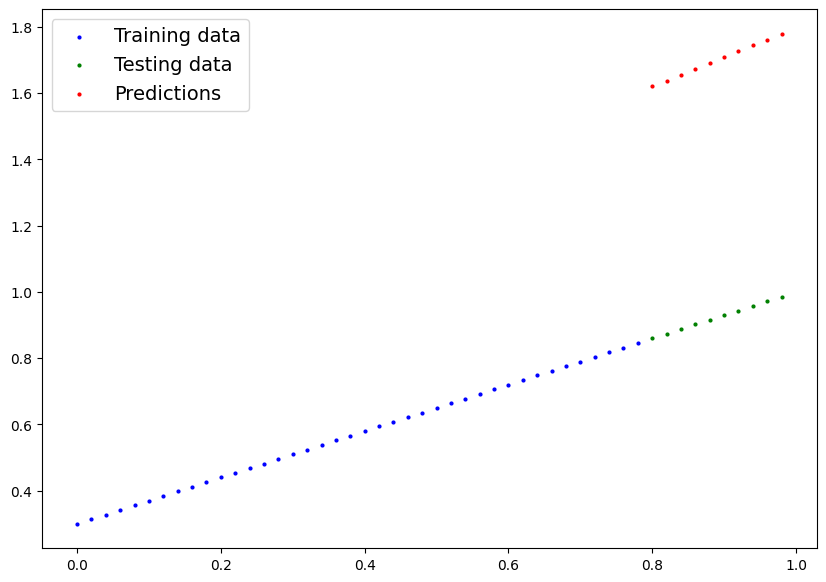

In [ ]:
plot_predictions(predictions=y_pred)

## 3.Training Model
The whole idea of training is for a model to move from some **unknown** paramaters(these may be random) to some *konwn* parameters

Or in other word from a poor representation of the data to a better respresetation.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

- Note: Loss function may also be called cost function or criterion in different areas. We refer it as a loss function

- **Loss function:** A function is to measure how wrong your model's prediction to ideal outputs, lower is better.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias) to improve the loss
  - Inside the optimizer you'll often have to set two paramters
    - params - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    - lr(learning rate) the learning rate is a hypterparameter that define how big/small the optimizer change the parameters with each step.(small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
- A training loop
- A testing loop

In [ ]:
# Setup a loss function
import torch.nn as nn
loss_fn = nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)
# lr = learning rate = the most important hyperparameter you can get
# we want to optimize the parameters present in our models
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)



**Q:** Which loss function and optimizer should I use?
**A:** This will be problem specific. But with experience, you will get an idea of what works and what doesn't with your particular problem set.

For example, for a regression promblem, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` is suffice.

But for classification problems like classifying whether a photo is a dog or a cat, you'll likely to use a loss fucntion of `nn.BCELoss()` (binary cross entropy loss).



### Building a training loop(and a testing loop) in PyTorch

A couple of things we need in a training loop
0. Loop through the data
1. Forward pass(this involves moving through our model's `forward()` to make prediction on data - also called forward propagation)
2. Calculate the loss(compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward(move through the neural network to calculate the gradient of our parameters of our model with respect to the
 loss(**backpropagation**))
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

B Notes:
- optimizer.zero_grad()
- torch.autograd(): https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

C Notes:
- Dropout: Radomly zero some element of the input tensor with probability `p`. This has proven to be an effective technique for regularization and preventing co-adaptation of neurons
- BatchNorm: Applies batch normlization over the input

In [ ]:
# An epoch is one loop through the data
epochs = 100
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model training mode
  model_0.train() # train mode in PyTorch sets all parameters require_gradients equal True

  epoch_count = []
  train_loss_values = []
  test_loss_values = []

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer no grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the our model's parameter
  loss.backward()

  # 5. Step the optimizer
  optimizer.step() # By default how the optimizer change will accumulate through the loop, so we have to zero above in step 3 for the next iteration of

  ### Testing
  # Turn off different settings in the model not needed for evaluation/testing
  model_0.eval()
  with torch.inference_mode():
    epoch_count.append(epoch)
    # Do the forward pass
    test_preds = model_0(X_test)
    # Calculate the loss
    test_loss = loss_fn(test_preds, X_test)

    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)


    if epoch % 10 == 0:
      print(f"Epoch:{epoch}|Loss:{loss}|TestLoss:{test_loss}")
      # Print out model state_dict()
      print(model_0.state_dict())


Epoch:0|Loss:0.6860889196395874|TestLoss:0.7967526912689209
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch:10|Loss:0.5708791017532349|TestLoss:0.6620427370071411
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch:20|Loss:0.45566922426223755|TestLoss:0.5273330211639404
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch:30|Loss:0.34045934677124023|TestLoss:0.3926231265068054
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch:40|Loss:0.2252494841814041|TestLoss:0.2579132914543152
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch:50|Loss:0.1100396141409874|TestLoss:0.12320347130298615
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch:60|Loss:0.009724985808134079|TestLoss:0.019335735589265823
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])
Epoch:70|Loss:0.006216754671186209|TestLoss:0.0218790285

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

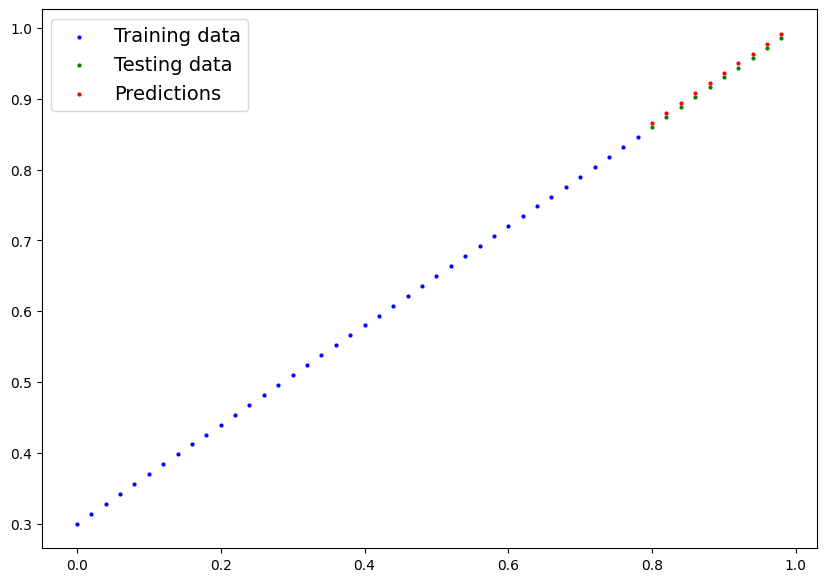

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

In [ ]:
import numpy
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.tensor(train_loss_values).numpy()

array([0.00442504], dtype=float32)

## 4.Saving a model in PyTorch
There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` allows you save a PyTorch object in Python's pickle format
2. `torch.load()` allows you load a saved PyTorch object in Python's pickle format
3. `torch.nn.Module.load_state_dict()` allows to load a model's save saved dictionary


In [ ]:
# Saving our pytorch model
from pathlib import Path

# 1.Create models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
# A common PyTorch convention to save the model is using either `.pt` or `.pth` extension filename
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
print(f"Saving the model to: {MODEL_SAVE_PATH}")

Saving the model to: models/01_pytorch_workflow_model_0.pth


## 5.Loading a PyTorch model
Since we save the model's `state_dict()` rather than the entire model, we'll create a new model's instance and load the saved `state_dict()` into that.

In [ ]:
# To load in a saved stated_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the parameters of new created instance with saved parameters)
# LinearRegressionModel is a subclass of nn.Module, so it can call load_state_dict
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some predictions with our saved model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

## 6.Put it all together
Go through the steps above and see it all in one place

### 6.0 Create device-agnostic Code
This means if we got a GPU our code will use it(for potentially faster computing).


In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cuda


### 6.1 Data


In [ ]:
# Linear Regression
weight = 0.8
bias = 0.2

# Create range values
start = 0
end = 1
step = 0.02
# Create features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1).to(device)
y = weight * X + bias

X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

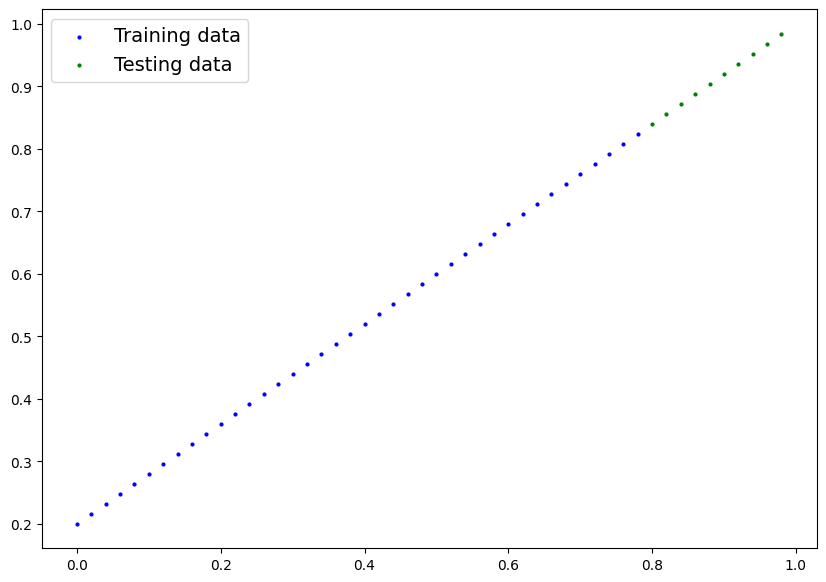

In [ ]:
# split the data
train_size = int(0.8 * len(X))
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu())

### 6.2 Building a PyTorch Linear model

In [ ]:
# Create a Linear model by subclassing nn.Module
class LinearRegresssionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.linear layer rather that parameters also called: linear transform, probing layer, dense layer, fully connected layer
    """The parameters of in_features and out_feature depend on the data you use
    This model is a linear regression model only has two parameters named "weight" which is 1 dimension and "bias".
    The output of this model is only a numerical value which dimension is 1.
    The in_features = 1, out_features = 1
    """
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the random seed
torch.manual_seed(42)
modelv2 = LinearRegresssionModelV2()
modelv2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Train the model

In [ ]:
# Check the model current device
next(modelv2.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
modelv2.to(device)

LinearRegresssionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# define optimizer and loss function
loss_fn = nn.L1Loss()
# Two parameter declared to optimize, paramters and learning rate
optimizer = torch.optim.SGD(params=modelv2.parameters(), lr = 0.01)

In [ ]:
epoches = 200
for epoch in range(epoches):
  modelv2.train()
  # forward pass
  y_preds = modelv2(X_train)
  # calculate the loss
  loss = loss_fn(y_preds, y_train)
  # optimizer zero grad
  optimizer.zero_grad()

  # loss backward()
  loss.backward()

  # optimizer.step
  optimizer.step()

  # evaluate the model
  if epoch % 10 == 0:
    modelv2.eval()
    with torch.inference_mode():
      # forward pass
      test_preds = modelv2(X_test)
      # calculate the loss
      test_loss = loss_fn(test_preds, y_test)
    print(f"Epoch:{epoch} | Loss:{loss} | test loss:{test_loss}")

Epoch:0 | Loss:0.6161779165267944 | test loss:0.5849762558937073
Epoch:10 | Loss:0.5009680986404419 | test loss:0.45026642084121704
Epoch:20 | Loss:0.3857581913471222 | test loss:0.3155565857887268
Epoch:30 | Loss:0.2705483138561249 | test loss:0.180846706032753
Epoch:40 | Loss:0.15533843636512756 | test loss:0.046136897057294846
Epoch:50 | Loss:0.05875825881958008 | test loss:0.06886561214923859
Epoch:60 | Loss:0.04580378159880638 | test loss:0.09473040699958801
Epoch:70 | Loss:0.041819483041763306 | test loss:0.09405827522277832
Epoch:80 | Loss:0.03831038996577263 | test loss:0.08853326737880707
Epoch:90 | Loss:0.034879546612501144 | test loss:0.08094760775566101
Epoch:100 | Loss:0.03144557774066925 | test loss:0.07267507165670395
Epoch:110 | Loss:0.028006771579384804 | test loss:0.06440252810716629
Epoch:120 | Loss:0.024577612057328224 | test loss:0.056816864758729935
Epoch:130 | Loss:0.021141953766345978 | test loss:0.04854437708854675
Epoch:140 | Loss:0.017704110592603683 | test l

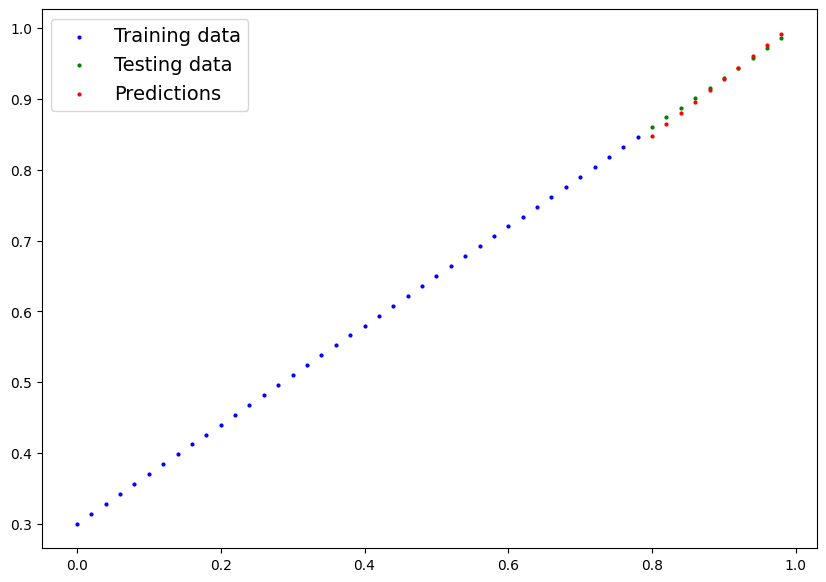

In [ ]:
with torch.inference_mode():
  preds = modelv2(X_test)

plot_predictions(predictions=preds.cpu())

### 6.5 Saving & loading a train model


In [ ]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")

# 2. Create model save path
MODEL_NAME = "modelv2"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model
print()
torch.save(obj=modelv2.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
new_model_v2 = LinearRegresssionModelV2()
new_model_v2.load_state_dict(torch.load(MODEL_SAVE_PATH))
new_model_v2.to(device)

LinearRegresssionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
new_model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2095], device='cuda:0'))])

In [ ]:
new_model_v2.eval()
with torch.inference_mode():
  new_preds = new_model_v2(X_test)

preds == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')